**Importando bibliotecas**

In [972]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from scipy import stats


**Importando bases de dados**

In [800]:
df_geocode = pd.read_csv('./bases_finais/final_df_geocode.csv', sep=';')
test_data = pd.read_csv('./bases_finais/final_test_data.csv', sep=';') # Testing Cost = custo de aplicação, custo para o laboratório
transactional_data = pd.read_csv('./bases_finais/final_transactional_data.csv', sep=';') # Testing Cost = Custo para o paciente
EconomicData_ZCTAs = pd.read_csv('./bases_finais/final_EconomicData_ZCTAs.csv', sep=';') 
DemographicData_ZCTAs = pd.read_csv('./bases_finais/final_DemographicData_ZCTAs.csv', sep=';')


**Storytelling**

Principais dados a serem analisados:
- População total do Zipcode
- Poder aquisitivo médio do Zipcode
- Média de idade do Zipcode
- Proporção de homens para mulheres do Zipcode

**1) População total do Zipcode**

Hipótese: Quanto maior a população local do Zipcode, maior será a quantidade do público e clientes do laboratório.

In [801]:
# separando laboratórios mais frequentados por quartis

quartis = transactional_data.lab_id.value_counts().quantile([0.25,0.5,0.75])
quartis = quartis.to_frame()
quartis.reset_index(inplace=True)
quartis.columns = ['quartil', 'quantidade_de_serviços']
fig = px.bar(quartis, 
             x='quartil', 
             y="quantidade_de_serviços", 
             barmode='group',
             labels={
                     "quartil": "Quartil",
                     "quantidade_de_serviços": "Quantidade de serviços"
                 },
             title="Quantidade de serviços por quartil",
             color="quartil",
             color_continuous_scale="burg",
             )
fig.show()

In [802]:
# pegando dados do 1° quartil
transactional_data_25 = transactional_data['lab_id'].value_counts()
transactional_data_25 = transactional_data_25.to_frame()
transactional_data_25 = transactional_data_25[transactional_data_25.lab_id <= 5466.25]
transactional_data_25.reset_index(inplace=True)
transactional_data_25 = transactional_data_25.rename(columns={'index': 'lab_id', 'lab_id':'contagem'})

# pegando dados do 2° quartil
transactional_data_50 = transactional_data['lab_id'].value_counts()
transactional_data_50 = transactional_data_50.to_frame()
transactional_data_50 = transactional_data_50[transactional_data_50.lab_id <= 12186.50]
transactional_data_50 = transactional_data_50[transactional_data_50.lab_id > 5466.25]
transactional_data_50.reset_index(inplace=True)
transactional_data_50 = transactional_data_50.rename(columns={'index': 'lab_id', 'lab_id':'contagem'})

# pegando dados do 3° quartil
transactional_data_75 = transactional_data['lab_id'].value_counts()
transactional_data_75 = transactional_data_75.to_frame()
transactional_data_75 = transactional_data_75[transactional_data_75.lab_id > 12186.50]
transactional_data_75.reset_index(inplace=True)
transactional_data_75 = transactional_data_75.rename(columns={'index': 'lab_id', 'lab_id':'contagem'})


In [805]:
# dando merge nos laboratorios do 1° quartil com os dados do df_geocode
df_geocode_combinando_transactional_data_25 = df_geocode.copy()
df_geocode_combinando_transactional_data_25.zipcode = df_geocode_combinando_transactional_data_25.zipcode.astype('object')
df_geocode_combinando_transactional_data_25 = df_geocode_combinando_transactional_data_25.merge(transactional_data_25, how="inner", on="lab_id")
df_geocode_combinando_transactional_data_25 = df_geocode_combinando_transactional_data_25.drop(columns=['address', 'location'])

# dando merge nos laboratorios do 2° quartil com os dados do df_geocode
df_geocode_combinando_transactional_data_50 = df_geocode.copy()
df_geocode_combinando_transactional_data_50.zipcode = df_geocode_combinando_transactional_data_50.zipcode.astype('object')
df_geocode_combinando_transactional_data_50 = df_geocode_combinando_transactional_data_50.merge(transactional_data_50, how="inner", on="lab_id")
df_geocode_combinando_transactional_data_50 = df_geocode_combinando_transactional_data_50.drop(columns=['address', 'location'])

# dando merge nos laboratorios do 3° quartil com os dados do df_geocode
df_geocode_combinando_transactional_data_75 = df_geocode.copy()
df_geocode_combinando_transactional_data_75.zipcode = df_geocode_combinando_transactional_data_75.zipcode.astype('object')
df_geocode_combinando_transactional_data_75 = df_geocode_combinando_transactional_data_75.merge(transactional_data_75, how="inner", on="lab_id")
df_geocode_combinando_transactional_data_75 = df_geocode_combinando_transactional_data_75.drop(columns=['address', 'location'])

# DemographicData_ZCTAs.zipcode = DemographicData_ZCTAs.zipcode.str.slice(start=6) -> Pega apenas a parte numérica do zipcode(usado somente uma vez, por isso comentado)
df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_25.copy()
df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs
df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_50.copy()
df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs
df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_75.copy()
df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs
DemographicData_ZCTAs.zipcode = DemographicData_ZCTAs.zipcode.astype('float')

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 1° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs.merge(DemographicData_ZCTAs, how="inner", on="zipcode")

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 2° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs.merge(DemographicData_ZCTAs, how="inner", on="zipcode")

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 3° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs.merge(DemographicData_ZCTAs, how="inner", on="zipcode")


df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs.drop(columns=['id', 'SexRatio(males per 100 females)', 'Population_Under5Years', 'Population_5to9Years', 'Population_10to14Years', 'Population_15to19Years','Population_20to24Years', 'Population_25to34Years', 'Population_35to44Years', 'Population_45to54Years','Population_55to59Years','Population_60to64Years','Population_65to74Years','Population_75to84Years','Population_85YearsAndOver', 'MedianAgeInYears']).head()

,lab_id,zipcode,contagem,total_population
0,L545,61469,2805,2213
1,L518,94566,1916,45893
2,L504,61282,3164,7732
3,L070,19036,5066,12894
4,L720,98034,1835,43471


In [806]:
# média populacional dos laboratórios do 1° quartil
media = df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs.total_population.mean()
print(f'A média da população dos zipcodes do 1° quartil é de {media:.1f} habitantes')

# média populacional dos laboratórios do 3° quartil
media = df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs.total_population.mean()
print(f'A média da população dos zipcodes do 2° quartil é de {media:.1f} habitantes')

# média populacional dos laboratórios do 3° quartil
media = df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs.total_population.mean()
print(f'A média da população dos zipcodes do 3° quartil é de {media:.1f} habitantes')

A média da população dos zipcodes do 1° quartil é de 19125.7 habitantes
A média da população dos zipcodes do 2° quartil é de 24408.5 habitantes
A média da população dos zipcodes do 3° quartil é de 44791.9 habitantes


In [808]:
medias = pd.Series([df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs.total_population.mean(), df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs.total_population.mean(), df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs.total_population.mean()]) 
medias = medias.to_frame()
medias.reset_index(inplace=True)
medias.columns = ['quartil', 'media_da_população_do_quartil']
medias.quartil = medias.quartil + 1
fig = px.bar(medias,
             x="quartil",
             y="media_da_população_do_quartil",
             labels={
                     "quartil": "Quartis",
                     "media_da_população_do_quartil": "Média da população por quartil"
             },
             barmode='group',
             color="media_da_população_do_quartil",
             color_continuous_scale="magenta",
             title="Média da população por quartil")
fig.show()

In [850]:
df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs['quartil'] = 1
df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs['quartil'] = 2
df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs['quartil'] = 3
df_concat = pd.concat([df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs, df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs], axis=0, join="inner")
df_concat = pd.concat([df_concat, df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs], axis=0, join="inner")
fig = px.scatter(df_concat, y="total_population", x="quartil", color='quartil', hover_name="zipcode", log_x=True)

fig.update_layout(coloraxis_colorbar=dict(
    title="Quartis",
))
fig.show()

**Conclusão:** Como a média da população local dos zipcodes do 3° quartil é muito maior do que a média dos zipcodes do 1° quartil, e considerando que esses quartis foram divididos de acordo com a quantidade de serviços feitos em cada laboratório, ou seja, os laboratórios do 3° quartil realizaram mais serviços do que os do 1° quartil, então é possível dizer que a população total do zipcode afeta diretamente na quantidade de serviços realizados pelo laboratório, e que para a análise de futuros laboratórios da rede, seria interessante observar zipcodes com uma população maior. 

-------------------------------------------------------------------------------------------------------------------------------

**2) Poder aquisitivo médio do Zipcode**

Hipótese: Quanto maior for o poder aquisitivo médio da população do zipcode, maior seria o público disposto a utilizar os serviços do laboratório.

In [809]:
# criando coluna de média salarial
purchasing_power_EconomicData_ZCTAs = EconomicData_ZCTAs.copy()
purchasing_power_EconomicData_ZCTAs['average'] = (((purchasing_power_EconomicData_ZCTAs['TotalHouseholds_LessThan$10.000'] * 10000) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$10.000to$14.999'] * 12250) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$15.000to$24.999'] * 20000) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$25.000to$34.999'] * 30000) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$35.000to$49.999'] * 42250) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$50.000to$74.999'] * 62250) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$75.000to$99.999'] * 87250) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$100.000to$149.999'] * 125000) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$150.000to$199.999'] * 175000) +
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$200.000OrMore'] * 200000))/
                                                  (purchasing_power_EconomicData_ZCTAs['TotalHouseholds_LessThan$10.000'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$10.000to$14.999'] +
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$15.000to$24.999'] +
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$25.000to$34.999'] +
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$35.000to$49.999'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$50.000to$74.999'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$75.000to$99.999'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$100.000to$149.999'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$150.000to$199.999'] + 
                                                   purchasing_power_EconomicData_ZCTAs['TotalHouseholds_$200.000OrMore'])).round(0)

In [882]:
# purchasing_power_EconomicData_ZCTAs.zipcode = purchasing_power_EconomicData_ZCTAs.zipcode.str.slice(start=6) -> Pega apenas a parte numérica do zipcode(usado somente uma vez, por isso comentado)
df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_25.copy()
df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs
df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_50.copy()
df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs
df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_75.copy()
df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs
purchasing_power_EconomicData_ZCTAs.zipcode = purchasing_power_EconomicData_ZCTAs.zipcode.astype('float')

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 1° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs.merge(purchasing_power_EconomicData_ZCTAs, how="inner", on="zipcode")
df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 1° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs.merge(purchasing_power_EconomicData_ZCTAs, how="inner", on="zipcode")
df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs

# dando merge no dataframe que combina os dados dos laboratorios do df_geocode e do 3° quartil com as informações dos zipcodes dos laboratórios
df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs = df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs.merge(purchasing_power_EconomicData_ZCTAs, how="inner", on="zipcode")
df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs.head()


,lab_id,zipcode,contagem,id,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore,average
0,L152,30096,95256,8600000US30096,1277,1020,2214,2771,3809,5563,3485,3025,1233,1428,71383.0
1,L520,13440,20481,8600000US13440,1227,842,1804,1798,1961,3345,1908,2095,779,502,65725.0
2,L141,98034,50631,8600000US98034,672,305,629,760,1474,2226,2609,3797,2317,2857,109136.0
3,L140,98034,23726,8600000US98034,672,305,629,760,1474,2226,2609,3797,2317,2857,109136.0
4,L524,30342,13187,8600000US30342,205,270,965,947,1290,1892,1263,1702,997,3446,108805.0


In [814]:
media = df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs.average.mean()
print(f'A média dos salários dos zipcodes do 1° quartil é de {media:.1f} dólares')

media = df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs.average.mean()
print(f'A média dos salários dos zipcodes do 2° quartil é de {media:.1f} dólares')

media = df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs.average.mean()
print(f'A média dos salários dos zipcodes do 3° quartil é de {media:.1f} dólares')

A média dos salários dos zipcodes do 1° quartil é de 88276.7 dólares
A média dos salários dos zipcodes do 2° quartil é de 90921.8 dólares
A média dos salários dos zipcodes do 3° quartil é de 88194.2 dólares


In [815]:
medias = pd.Series([df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs.average.mean(), df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs.average.mean(), df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs.average.mean()]) 
medias = medias.to_frame()
medias.reset_index(inplace=True)
medias.columns = ['quartil', 'media_do_salario_do_quartil']
medias.quartil = medias.quartil + 1
fig = px.bar(medias, 
             x="quartil",
             y="media_do_salario_do_quartil",
             labels={
                     "quartil": "Quartis",
                     "media_do_salario_do_quartil": "Média do salário por quartil"
             },
             barmode='group',
             color="media_do_salario_do_quartil",
             color_continuous_scale="magenta",
             title="Média dos salários da população dos zipcodes dos quartis")
fig.show()

In [851]:
df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs['quartil'] = 1
df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs['quartil'] = 2
df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs['quartil'] = 3
df_concat = pd.concat([df_geocode_combinando_transactional_data_25_e_purchasing_power_EconomicData_ZCTAs, df_geocode_combinando_transactional_data_50_e_purchasing_power_EconomicData_ZCTAs], axis=0, join="inner")
df_concat = pd.concat([df_concat, df_geocode_combinando_transactional_data_75_e_purchasing_power_EconomicData_ZCTAs], axis=0, join="inner")
fig = px.scatter(df_concat, y="average", x="quartil", color='quartil', hover_name="zipcode", log_x=True)

fig.update_layout(coloraxis_colorbar=dict(
    title="Quartis",
))
fig.show()

**Conclusão:** A média dos salários dos zipcodes do 1° quartil é quase igual e até maior do que as dos zipcodes do 3° quartil, rejeitando a hipótese de que o poder aquisitivo interfira fortemente na utilização dos laboratórios. 

-------------------------------------------------------------------------------------------------------------------------------

**3) Média de idade do Zipcode**

Hipótese: Pessoas mais velhas são mais propensas a utilizar os serviços dos laboratórios.

In [816]:
pacientes_unicos_transactional_data = transactional_data.copy()
pacientes_unicos_transactional_data = pacientes_unicos_transactional_data.drop_duplicates(subset=['patient_id'], keep='first') # pacientes sem repetição
pacientes_unicos_transactional_data.reset_index(inplace=True, drop=True) # resetando index
pacientes_unicos_transactional_data['date_of_service'] = pd.to_datetime(pacientes_unicos_transactional_data['date_of_service'], format='%Y-%m-%d')
pacientes_unicos_transactional_data['date_of_birth'] = pd.to_datetime(pacientes_unicos_transactional_data['date_of_birth'], format='%Y-%m-%d %H:%M:%S') # cortando a hora das datas de nascimento
pacientes_unicos_transactional_data['year'] = pd.DatetimeIndex(pacientes_unicos_transactional_data['date_of_birth']).year
pacientes_unicos_transactional_data.head()

,patient_id,gender,date_of_birth,date_of_service,service_id,lab_id,cod_item,testing_cost,year
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,"9,0",1976.0
1,10210848051-BIO003,F,1982-07-16,2019-01-30,571904618615-38,L133,70001115,"39,0",1982.0
2,10210848087-BIO003,F,1989-07-03,2019-01-30,576608412729-91,L167,70000301,"12,0",1989.0
3,10210264021-BIO003,F,1991-06-03,2019-01-25,437707024889-179,L662,70000139,"14,0",1991.0
4,10210845039-BIO003,M,2017-03-22,2019-01-25,575202384562-74,L156,70001103,"42,0",2017.0


In [817]:
pacientes_unicos_transactional_data['year'] = pd.DatetimeIndex(pacientes_unicos_transactional_data['date_of_birth']).year
pacientes_unicos_transactional_data['idade'] = (2022 - pacientes_unicos_transactional_data['year'])
pacientes_unicos_transactional_data.head()

,patient_id,gender,date_of_birth,date_of_service,service_id,lab_id,cod_item,testing_cost,year,idade
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,"9,0",1976.0,46.0
1,10210848051-BIO003,F,1982-07-16,2019-01-30,571904618615-38,L133,70001115,"39,0",1982.0,40.0
2,10210848087-BIO003,F,1989-07-03,2019-01-30,576608412729-91,L167,70000301,"12,0",1989.0,33.0
3,10210264021-BIO003,F,1991-06-03,2019-01-25,437707024889-179,L662,70000139,"14,0",1991.0,31.0
4,10210845039-BIO003,M,2017-03-22,2019-01-25,575202384562-74,L156,70001103,"42,0",2017.0,5.0


<AxesSubplot:title={'center':'Distribuição de idades'}, xlabel='idade', ylabel='Quantidade de pessoas'>

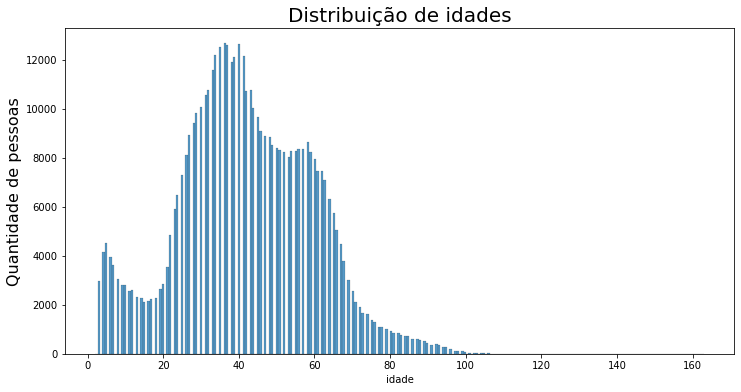

In [854]:
# ax = sns.histplot(pacientes_unicos_transactional_data['idade'],bins=10)
ax= sns.histplot(data=pacientes_unicos_transactional_data, x="idade")
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de idades', fontsize=20)
ax.set_ylabel('Quantidade de pessoas', fontsize=16)
ax

**Conclusão:** É possível concluir então que pessoas por volta dos 40 anos são as que mais frequentam os laboratórios da rede, assim, seria interessante procurarmos por zipcodes que tenham uma média de idade próxima a esse valor.

-------------------------------------------------------------------------------------------------------------------------------

**4) Proporção de homens para mulheres do Zipcode**

*Entendendo dados*

In [819]:
transactional_data.gender.value_counts()

F    1491030
M     849683
I          9
Name: gender, dtype: int64

In [820]:
pacientes_unicos_transactional_data.gender.value_counts()

F    341863
M    159582
I         1
Name: gender, dtype: int64

In [821]:
proporcao = 341863/(pacientes_unicos_transactional_data.gender.count())
print(f'{(proporcao * 100):.1f}% dos pacientes são do gênero feminino')

68.2% dos pacientes são do gênero feminino


Hipótese: Zipcodes com maior proporção de mulheres para homens são mais propensos a serem frequentados.

In [822]:
# utilizando os quartis novamente
media = df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean()
print(f'A média de quantidade de homens por 100 mulheres no 1° quartil é {media:.1f} homens')
# df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs = df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs.drop(columns=['id', 'total_population', 'Population_Under5Years', 'Population_5to9Years', 'Population_10to14Years', 'Population_15to19Years','Population_20to24Years', 'Population_25to34Years', 'Population_35to44Years', 'Population_45to54Years','Population_55to59Years','Population_60to64Years','Population_65to74Years','Population_75to84Years','Population_85YearsAndOver', 'MedianAgeInYears'])

media = df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean()
print(f'A média de quantidade de homens por 100 mulheres no 2° quartil é {media:.1f} homens')

media = df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean()
print(f'A média de quantidade de homens por 100 mulheres no 3° quartil é {media:.1f} homens')

A média de quantidade de homens por 100 mulheres no 1° quartil é 101.5 homens
A média de quantidade de homens por 100 mulheres no 2° quartil é 99.3 homens
A média de quantidade de homens por 100 mulheres no 3° quartil é 95.7 homens


In [823]:
medias = pd.Series([df_geocode_combinando_transactional_data_25_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean(), df_geocode_combinando_transactional_data_50_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean(), df_geocode_combinando_transactional_data_75_e_DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean()]) 
medias = medias.to_frame()
medias.reset_index(inplace=True)
medias.columns = ['quartil','proporcao_de_pessoas_por_gênero_M/F_dos_zipcodes_dos_quartis']
medias.quartil = medias.quartil + 1
fig = px.bar(medias, 
             x="quartil",
             y="proporcao_de_pessoas_por_gênero_M/F_dos_zipcodes_dos_quartis",
             labels={
                     "quartil": "Quartis",
                     "proporcao_de_pessoas_por_gênero_M/F_dos_zipcodes_dos_quartis": "Quantidade de homens por 100 mulheres"
             },
             barmode='group',
             color="proporcao_de_pessoas_por_gênero_M/F_dos_zipcodes_dos_quartis",
             color_continuous_scale="magenta",
             title="Média da população masculina para a feminina nos zipcodes dos quartis")
fig.show()

**Conclusão:** É possível concluir então que laboratórios com zipcode que possuem uma proporção menor de homens para mulheres são mais frequentados, confirmando a hipótese que pessoas do gênero feminino têm maior tendência a frequentar os laboratórios.

-------------------------------------------------------------------------------------------------------------------------------

**Filtrando dados após confirmação/rejeição das hipóteses**

**População total do Zipcode**

Sabendo que a população total do zipcode interfere diretamente na frequência e utilização dos serviços do laboratório, tentaremos os zipcodes considerando a população total no local.

*Média da população dos zipcodes*

In [929]:
media = DemographicData_ZCTAs.total_population.mean()
print(f'A média da população dos zipcodes analisados é de {media:.0f} habitantes')

A média da população dos zipcodes analisados é de 10090 habitantes


*Zipcodes com a maior população*

In [930]:
max_population_DemographicData_ZCTAs = DemographicData_ZCTAs.copy()
max_population_DemographicData_ZCTAs.sort_values(by=['total_population'], ascending=False, inplace=True)
quartis = max_population_DemographicData_ZCTAs[['total_population']].quantile([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])
quartis.reset_index(inplace=True)
quartis.columns = ['quartil', 'populacao_total']
fig = px.bar(quartis, 
             x='quartil', 
             y="populacao_total", 
             barmode='group',
             labels={
                     "quartil": "Quartil",
                     "populacao_total": "População total"
                 },
             title="Quantidade de habitantes por quartil",
             color="quartil",
             color_continuous_scale="Blugrn",
             )
fig.show()

Como possíveis destinos para futuros laboratórios da rede, seria interessante que considerássemos locais apenas com a população total entre os 5% dos dados analisados, ou seja, zipcodes com a população acima de 41711 habitantes. 

In [931]:
top_10_DemographicData_ZCTAs = max_population_DemographicData_ZCTAs[max_population_DemographicData_ZCTAs['total_population'] >= 41711]
top_10_DemographicData_ZCTAs.reset_index(inplace=True, drop=True)
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs.drop(columns=['id', 'Population_Under5Years', 'Population_5to9Years', 'Population_10to14Years', 'Population_15to19Years','Population_20to24Years', 'Population_25to34Years', 'Population_35to44Years', 'Population_45to54Years','Population_55to59Years','Population_60to64Years','Population_65to74Years','Population_75to84Years','Population_85YearsAndOver'])
top_10_DemographicData_ZCTAs

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,77449.0,128294,91.5,31.7
1,77494.0,118291,93.7,35.2
2,11368.0,112088,109.4,32.9
3,79936.0,111620,96.3,31.8
4,90011.0,111165,102.3,28.7
...,...,...,...,...
1621,623.0,41746,93.2,42.6
1622,19082.0,41741,92.9,32.8
1623,95621.0,41740,93.8,39.7
1624,77042.0,41734,83.8,31.8


Considerando os zipcodes que possuem a populção total nas 10% maiores dos zipcodes analisados, reduzindo a quantindade de possíveis locais para futuros laboratórios para 1626 locais potenciais.

-------------------------------------------------------------------------------------------------------------------------------

**Média de idade do Zipcode**

Considerando o médio/longo prazo, é interessante procurarmos por locais que possuem a média de idade entre 35 e 40 anos, levando em conta que as pessoas com idade entre 40 e 45 anos são as que mais frequentam os laboratórios, tentaremos filtrar zipcodes que possuem uma média de idade nessa faixa de valor. 

In [932]:
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs.MedianAgeInYears > 35]
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs.MedianAgeInYears < 40]
top_10_DemographicData_ZCTAs.reset_index(inplace=True, drop=True)
top_10_DemographicData_ZCTAs

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,77494.0,118291,93.7,35.2
1,75034.0,108525,95.3,36.8
2,11385.0,107796,98.8,35.2
3,75070.0,104415,91.8,37.1
4,11236.0,100844,77.0,38.0
...,...,...,...,...
611,1085.0,41780,92.7,39.9
612,60103.0,41755,100.6,39.9
613,85044.0,41746,93.4,37.7
614,95621.0,41740,93.8,39.7


Considerando as idades médias dos zipcodes analisados, e que temos interesse nos zipcodes com idades médias próximas aos 42 anos, conseguimos reduzir a quantidade de locais potenciais para futuros laboratórios a 616 zipcodes.

-------------------------------------------------------------------------------------------------------------------------------

**Proporção de homens para mulheres do Zipcode**

A  4° hipótese confirmou que zipcodes com uma proporção maior de pessoas do gênero feminino do que do gênero masculino tendem a utilizar os laboratórios com maior frequência, sendo assim, procuraremos por zipcodes que tenham essa proporção maior.

In [933]:
quartis = top_10_DemographicData_ZCTAs['SexRatio(males per 100 females)'].quantile([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])
quartis = quartis.to_frame()
quartis.reset_index(inplace=True)
quartis.columns = ['quartil', 'SexRatio(males per 100 females)']
fig = px.bar(quartis, 
             x='quartil', 
             y="SexRatio(males per 100 females)", 
             barmode='group',
             labels={
                     "quartil": "Quartil",
                     "SexRatio(males per 100 females)": "Proporção homens / 100 mulheres"
                 },
             title="Proporção homens / 100 mulheres",
             color="quartil",
             color_continuous_scale="brwnyl",
             )
fig.show()


Nesse caso, temos mais interesse nos dados do 1° quartil, pois sabemos que os zipcodes mais interessantes são aqueles que possuem uma proporção maior de mulheres para homens

In [934]:
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs['SexRatio(males per 100 females)'] < 88]
top_10_DemographicData_ZCTAs.reset_index(inplace=True, drop=True)
top_10_DemographicData_ZCTAs.shape

(49, 4)

Conseguimos reduzir a quantidade de zipcodes potenciais para futuros laboratórios para 49 possíveis locais, considerando os locais que tem a menor proporção de homens para mulheres.

-------------------------------------------------------------------------------------------------------------------------------

**Eliminando zipcodes que já possuem laboratórios**

Vamos eliminar os zipcodes que já possuem um laboratório da rede

In [935]:
df_geocode_zipcodes = df_geocode.zipcode.copy()
df_geocode_zipcodes = df_geocode_zipcodes.to_frame()
df_geocode_zipcodes = df_geocode_zipcodes.zipcode.astype('float')
df_geocode_zipcodes = df_geocode_zipcodes.to_frame()
df_geocode_zipcodes.head()

,zipcode
0,30096.0
1,13440.0
2,98034.0
3,30342.0
4,61469.0


In [936]:
df_geocode_zipcodes = df_geocode_zipcodes.merge(top_10_DemographicData_ZCTAs, how="inner", on="zipcode")
df_geocode_zipcodes

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears


Nenhum dos zipcodes que consideramos possíveis locais para novos laboratórios possui um laboratório da rede.

-------------------------------------------------------------------------------------------------------------------------------

**Conclusão e definição de zipcodes**

Conseguimos estabelecer 49 zipcodes mais interessantes para futuros laboratórios, agora, vamos analisar esses 49 locais em conjunto, considerando aqueles que melhor se classificam nos critérios de população total e proporção de pessoas do genero feminino/masculino.

*Ordenando por população total*

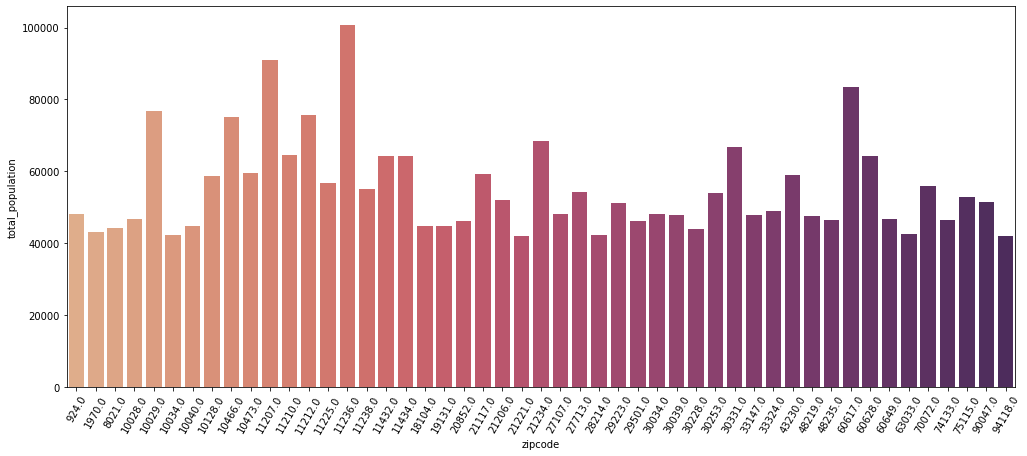

In [954]:
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs.sort_values(by=['total_population'], ascending=False)
plt.figure(figsize = (17,7))
ax = sns.barplot(data=top_10_DemographicData_ZCTAs, x='zipcode', y='total_population', palette="flare")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60);

In [939]:
top_10_DemographicData_ZCTAs.sort_values(by=['total_population'], ascending=False).head(8)

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,11236.0,100844,77.0,38.0
1,11207.0,91083,79.8,35.2
2,60617.0,83553,83.0,36.0
3,10029.0,76713,84.1,35.9
4,11212.0,75605,71.2,38.3
5,10466.0,75039,79.7,36.6
6,21234.0,68381,87.9,39.6
7,30331.0,66658,77.4,36.4


Os 8 melhores zipcodes no quesito população total são:
   - 11236
   - 11207
   - 60617
   - 10029
   - 11212
   - 10466
   - 21234
   - 30331

-------------------------------------------------------------------------------------------------------------------------------

*Ordenando de por proporção de pessoas de gênero F/M*

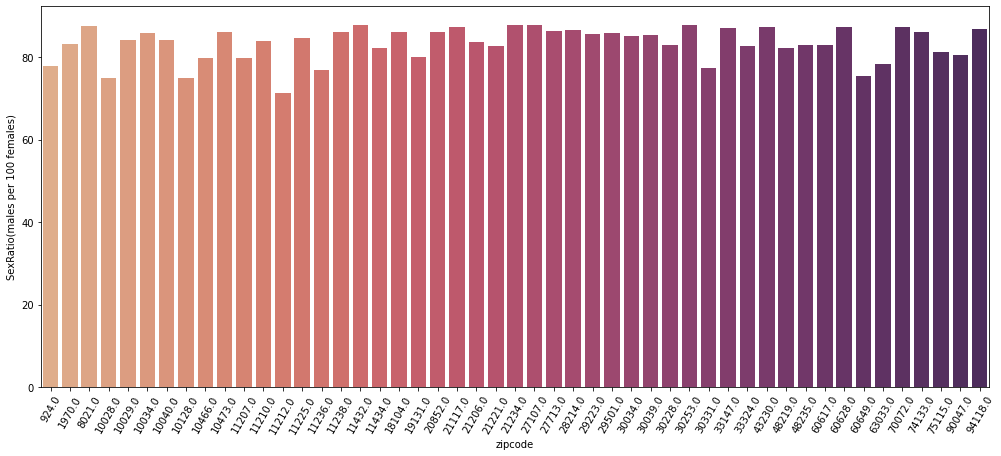

In [950]:
top_10_DemographicData_ZCTAs = top_10_DemographicData_ZCTAs.sort_values(by=['SexRatio(males per 100 females)'], ascending=False)
plt.figure(figsize = (17,7))
ax = sns.barplot(data=top_10_DemographicData_ZCTAs, x='zipcode', y='SexRatio(males per 100 females)', color="SexRatio(males per 100 females)", palette="flare")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60);

In [940]:
top_10_DemographicData_ZCTAs.sort_values(by=['SexRatio(males per 100 females)']).head(8)

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
4,11212.0,75605,71.2,38.3
32,10028.0,46768,75.0,38.8
15,10128.0,58636,75.0,39.3
33,60649.0,46633,75.4,37.3
0,11236.0,100844,77.0,38.0
7,30331.0,66658,77.4,36.4
27,924.0,48141,77.8,39.8
44,63033.0,42544,78.3,37.1


Os 8 melhores zipcodes no quesito proporção de pessoas do gênero M/F são:
   - 11212
   - 10028
   - 10128
   - 60649
   - 11236
   - 30331
   - 924
   - 63033

**Definição dos 3 zipcodes mais interessante para instalação de novos laboratórios**

Considerando os gráficos e os resultados apresentados para os quesitos de população total e proporção de pessoas do gênero M/F, observamos que ao cruzar os 8 melhores zipcodes de cada um dos quesitos, chegamos em 3 zipcodes que parecem ser mais interessantes considerando essas duas análises. Esses 3 são:
- 11212
- 11236
- 30331

**Analisando cada zipcode individualmente:**

Zipcode 11212: 

In [980]:
zip_11212 = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs['zipcode'] == 11212].copy()
zip_11212.reset_index(inplace=True, drop=True)
zip_11212.loc[1, :] = ['médias', DemographicData_ZCTAs.total_population.mean().round(2), DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean().round(2), DemographicData_ZCTAs['MedianAgeInYears'].mean().round(2)]
zip_11212

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,11212.0,75605.00,71.20,38.3
1,médias,10090.08,116.87,42.7


Analisando essas informações e as hipóteses confirmadas anteriormente, podemos afirmar que o zipcode 11212 seria uma boa opção para um novo laboratório, considerando uma alta população local, uma ótima proporção do número de mulheres para homens e uma boa média de idade pensando nos próximos anos do laboratório. 

-------------------------------------------------------------------------------------------------------------------------------

Zipcode 11236:

In [981]:
zip_11236 = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs['zipcode'] == 11236].copy()
zip_11236.reset_index(inplace=True, drop=True)
zip_11236.loc[1, :] = ['médias', DemographicData_ZCTAs.total_population.mean().round(2), DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean().round(2), DemographicData_ZCTAs['MedianAgeInYears'].mean().round(2)]
zip_11236

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,11236.0,100844.00,77.00,38.0
1,médias,10090.08,116.87,42.7


Analisando essas informações e as hipóteses confirmadas anteriormente, podemos afirmar que o zipcode 11236 seria uma boa opção para um novo laboratório, considerando uma população local muito alta, sendo quase 10x maior do que a média dos zipcodes analisados, também uma ótima proporção do número de mulheres para homens e uma boa média de idade pensando nos próximos anos do laboratório.

-------------------------------------------------------------------------------------------------------------------------------

Zipcode 30331:

In [983]:
zip_30331 = top_10_DemographicData_ZCTAs[top_10_DemographicData_ZCTAs['zipcode'] == 30331].copy()
zip_30331.reset_index(inplace=True, drop=True)
zip_30331.loc[1, :] = ['médias', DemographicData_ZCTAs.total_population.mean().round(2), DemographicData_ZCTAs['SexRatio(males per 100 females)'].mean().round(2), DemographicData_ZCTAs['MedianAgeInYears'].mean().round(2)]
zip_30331

,zipcode,total_population,SexRatio(males per 100 females),MedianAgeInYears
0,30331.0,66658.00,77.40,36.4
1,médias,10090.08,116.87,42.7


Analisando essas informações e as hipóteses confirmadas anteriormente, podemos afirmar que o zipcode 30331 seria uma boa opção para um novo laboratório, considerando uma população consideravelmente maior do que as analisadas no zipcode, também uma boa proporção do número de mulheres para homens e uma boa média de idade pensando nos próximos anos do laboratório.